In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 24.9 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.6/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
numpy               ✅ 1.26.4<2.0.0; sys_platform == "darwin"
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torch               ✅ 2.5.1+cu121!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.66.6>=4.64.0
psu

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="muKdCsuQMnd1JalI6jJw")
project = rf.workspace("war-thunder-dataset").project("private-dataset")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Private-Dataset-1 in yolov8:: 100%|██████████| 1006/1006 [00:00<00:00, 5651.04it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Private-Dataset-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Private-Dataset-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.28it/s]
                   all         42        126      0.926       0.84       0.86      0.463
             destroyed         12         14      0.909      0.643      0.738      0.356
                 enemy         34         70      0.833      0.855      0.831      0.316
              teammate         24         24          1      0.917      0.922      0.722
            teamplayer          7         18      0.963      0.944       0.95      0.457
Speed: 4.2ms preprocess, 24.7ms inference, 0.0ms loss, 13.4ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at http

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/screenshots/

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/2 /content/screenshots/screenshot_38.png: 384x640 (no detections), 96.3ms
image 2/2 /content/screenshots/screenshot_45.png: 384x640 (no detections), 25.2ms
Speed: 3.0ms preprocess, 60.7ms inference, 16.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Private-Dataset-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

In [7]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Private-Dataset-1/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.11it/s]
                   all         42        126      0.957      0.842      0.897      0.492
             destroyed         12         14      0.932      0.714        0.8      0.357
                 enemy         34         70      0.919      0.829      0.886      0.352
              teammate         24         24          1      0.881      0.926      0.748
            teamplayer          7         18      0.978      0.944      0.974      0.513
Speed: 4.2ms preprocess, 25.9ms inference, 0.0ms loss, 14.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https

In [10]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source=/content/Private-Dataset-1/test/images

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs

image 1/21 /content/Private-Dataset-1/test/images/frame0_png.rf.15e2a1c8c2b6712290d0e853b42a8e1d.jpg: 640x640 1 teammate, 37.3ms
image 2/21 /content/Private-Dataset-1/test/images/frame1050_png.rf.2a3a80687fa254deccf75754d5471253.jpg: 640x640 1 destroyed, 1 enemy, 1 teammate, 37.0ms
image 3/21 /content/Private-Dataset-1/test/images/frame1140_png.rf.87e74012683137f015b8f024fc317a80.jpg: 640x640 2 enemys, 1 teammate, 36.9ms
image 4/21 /content/Private-Dataset-1/test/images/frame1290_png.rf.b047de83353897bd4cb607ce6d7018d8.jpg: 640x640 2 enemys, 1 teammate, 34.6ms
image 5/21 /content/Private-Dataset-1/test/images/frame1530_png.rf.4d05fcc6d65f35a3a7c06582644bc2c3.jpg: 640x640 2 enemys, 1 teammate, 32.6ms
image 6/21 /content/Private-Dataset-1/test/images/frame1920_png.rf.114a5687d97707ea3b12a4fbdaf713cd.jpg: 640x640 2 destroyeds

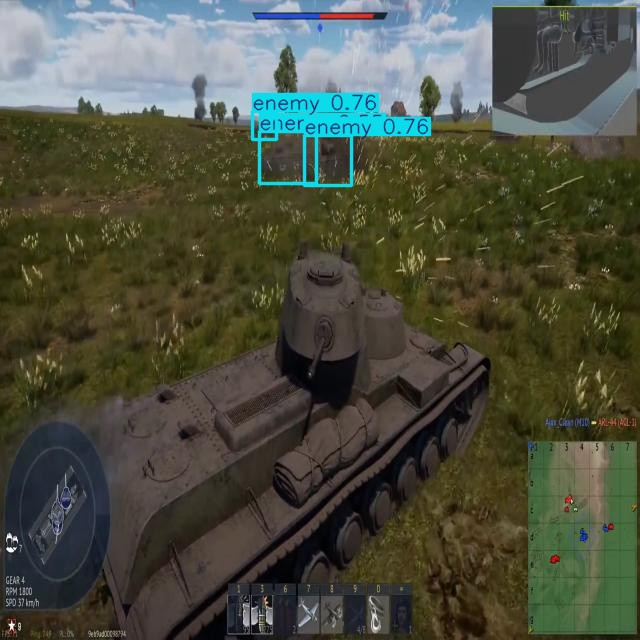

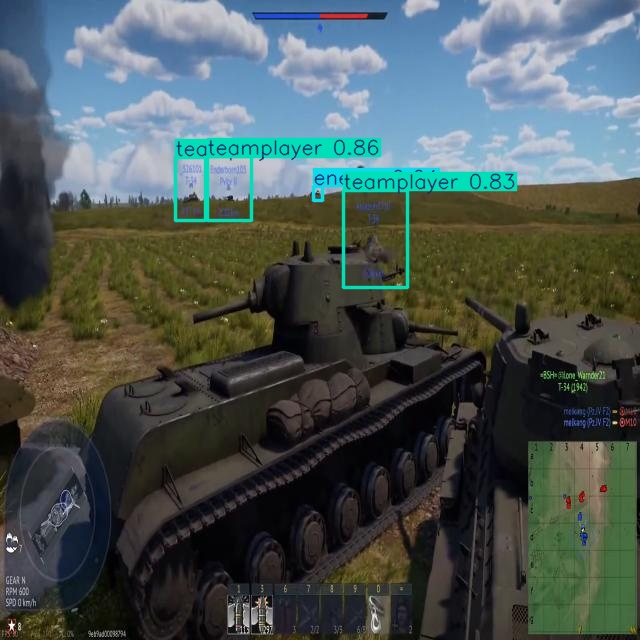

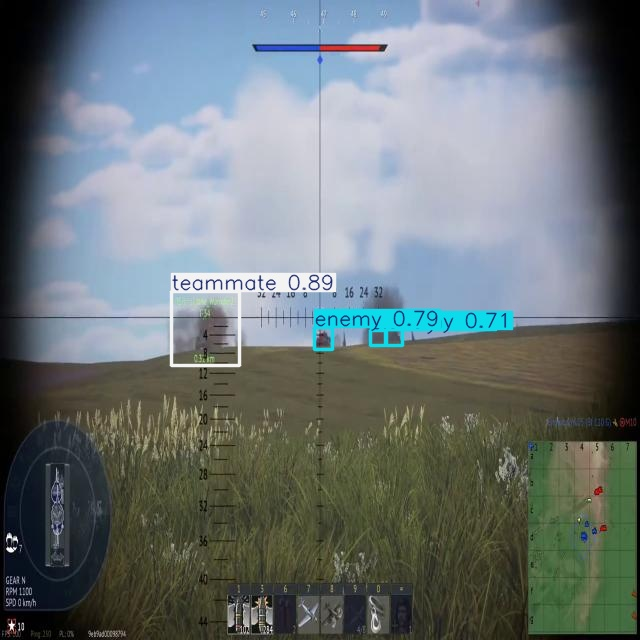

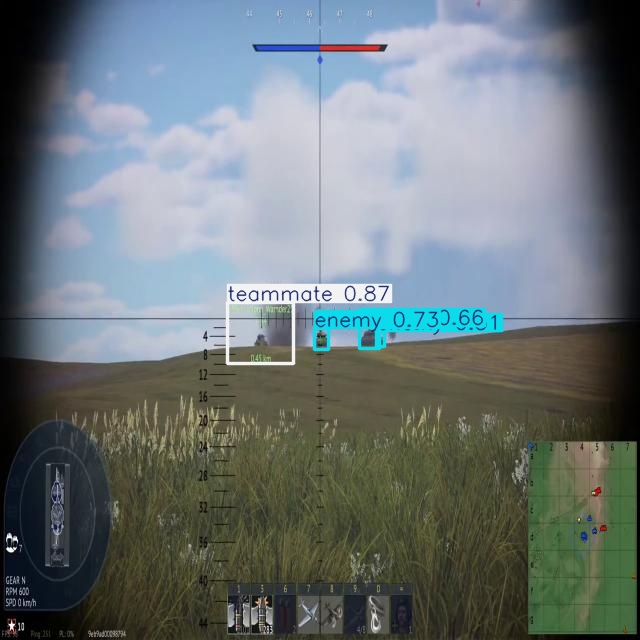

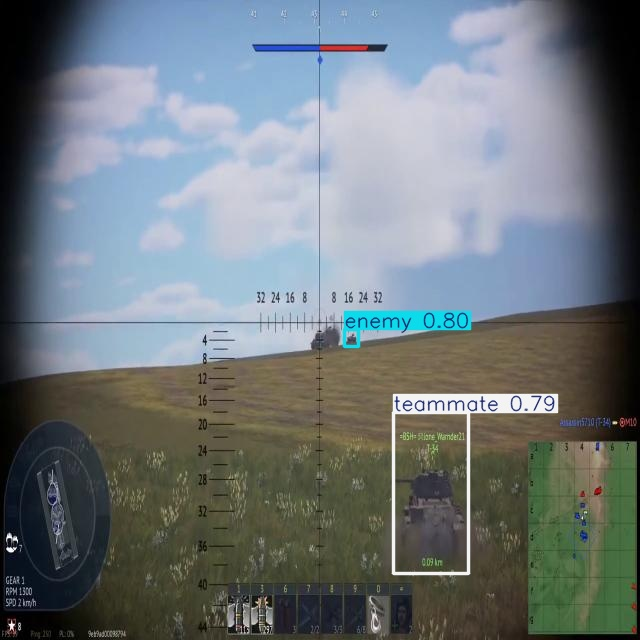

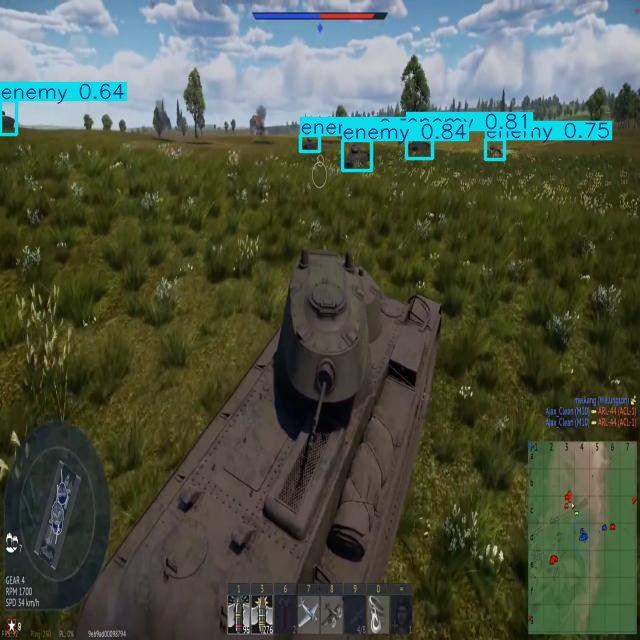

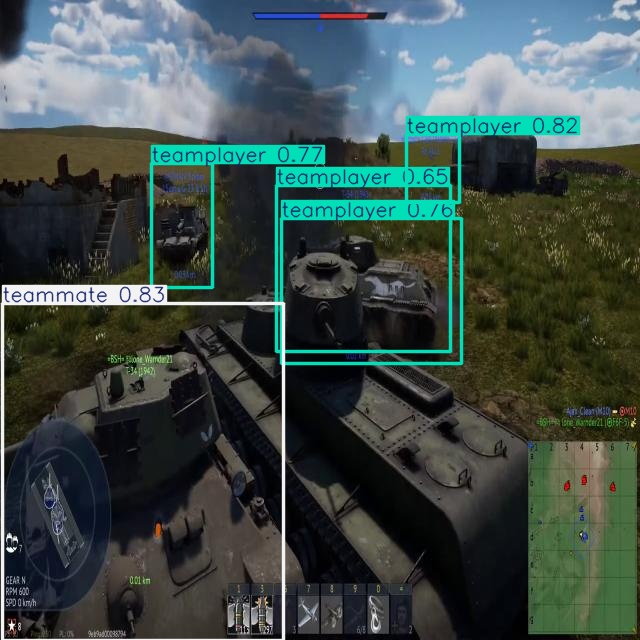

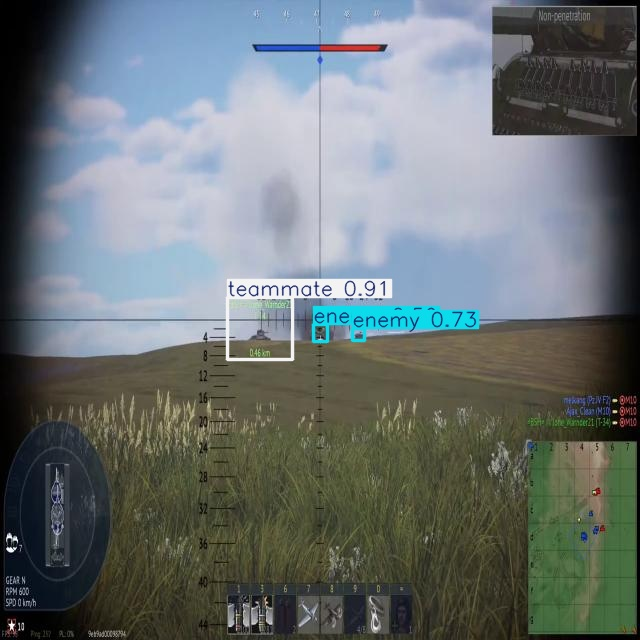

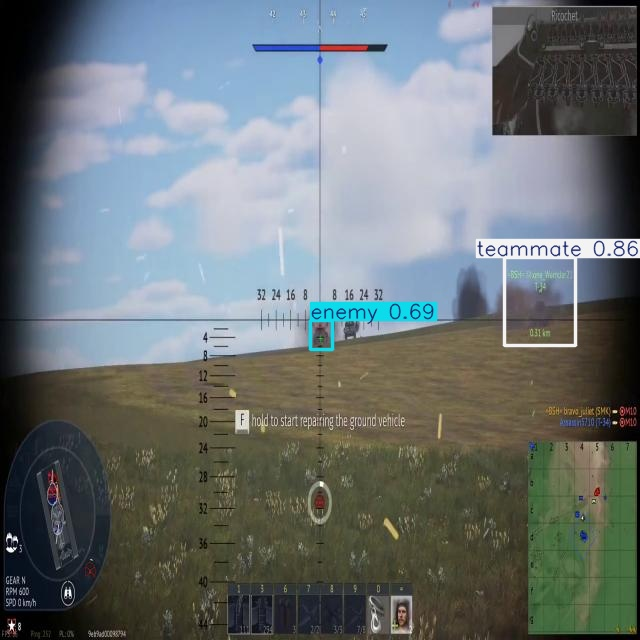

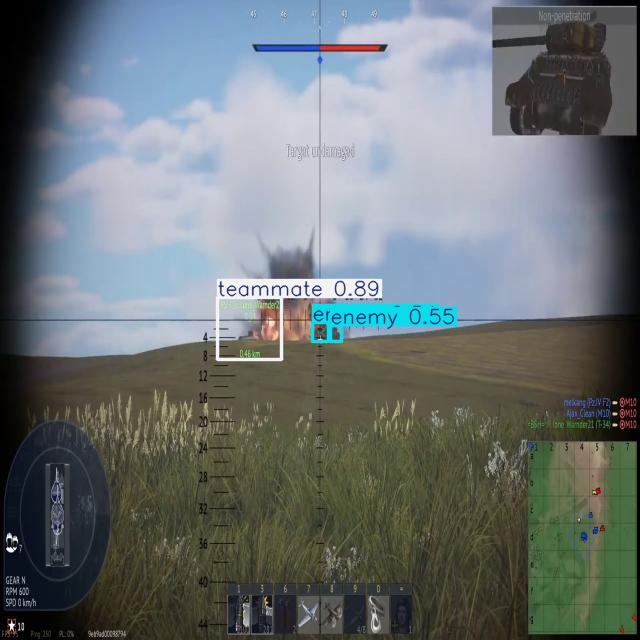

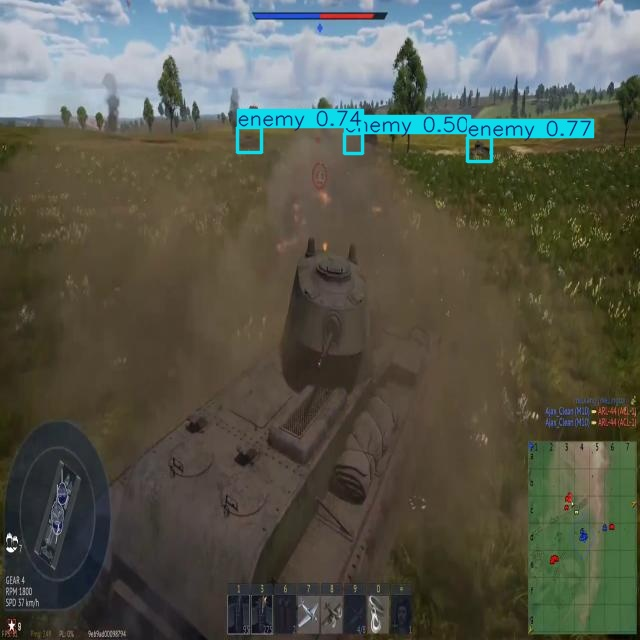

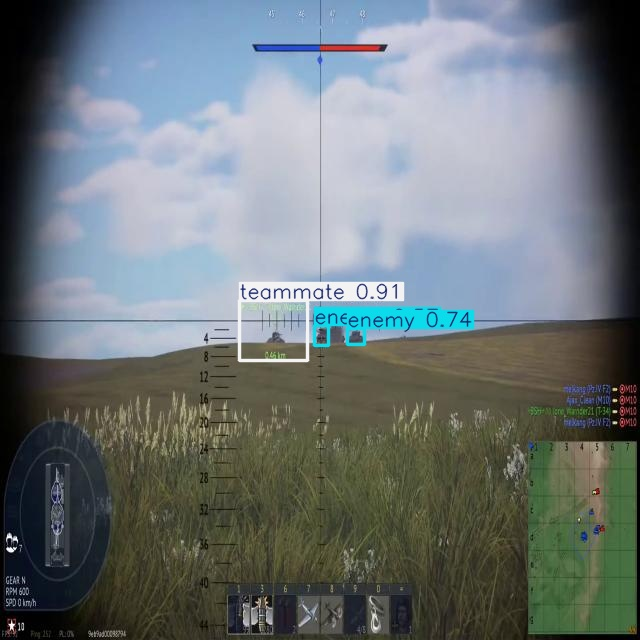

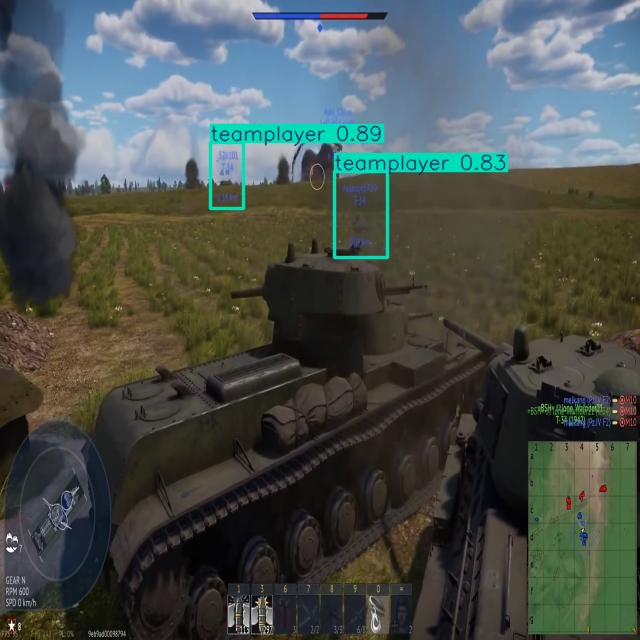

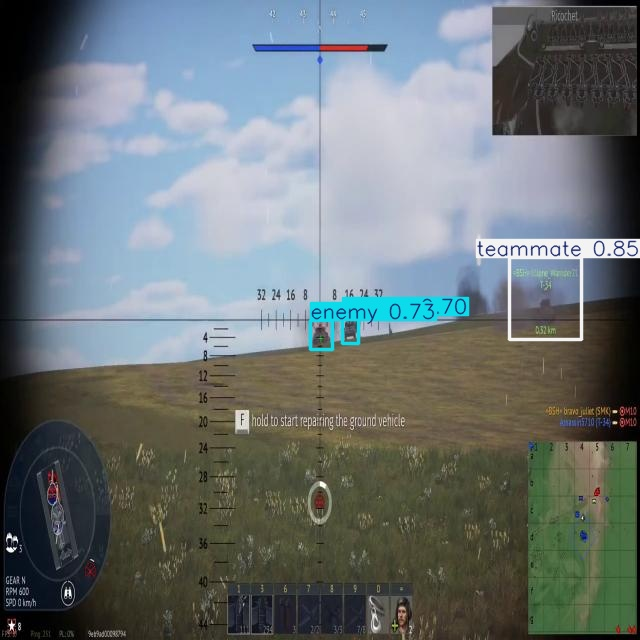

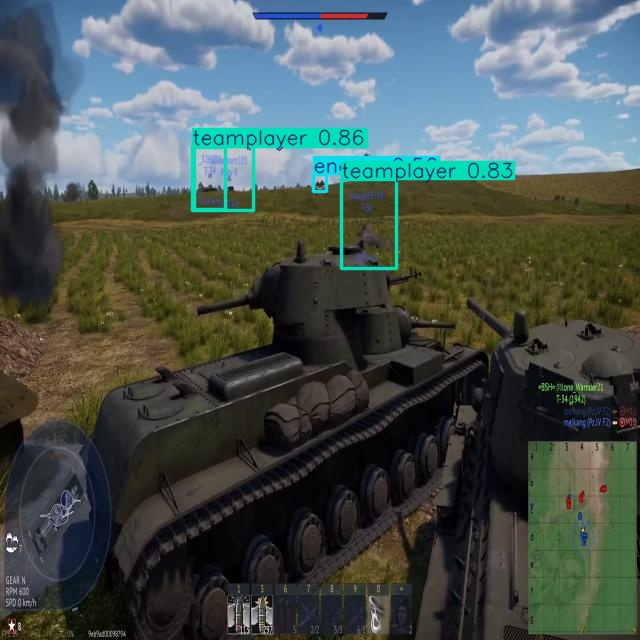

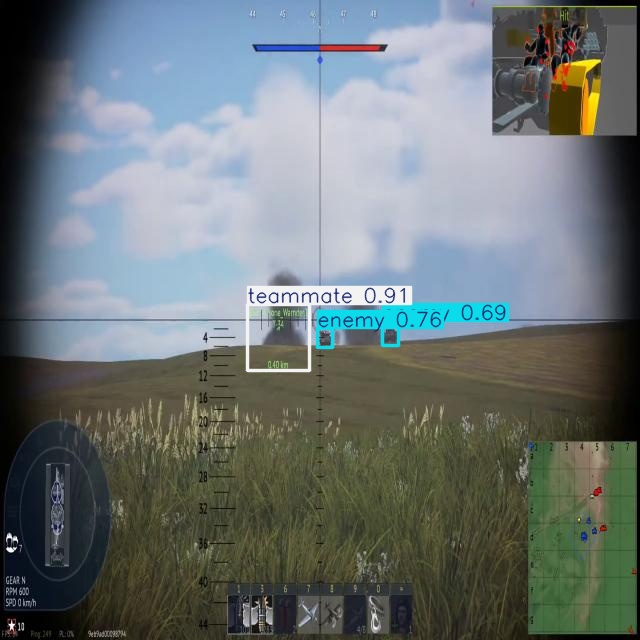

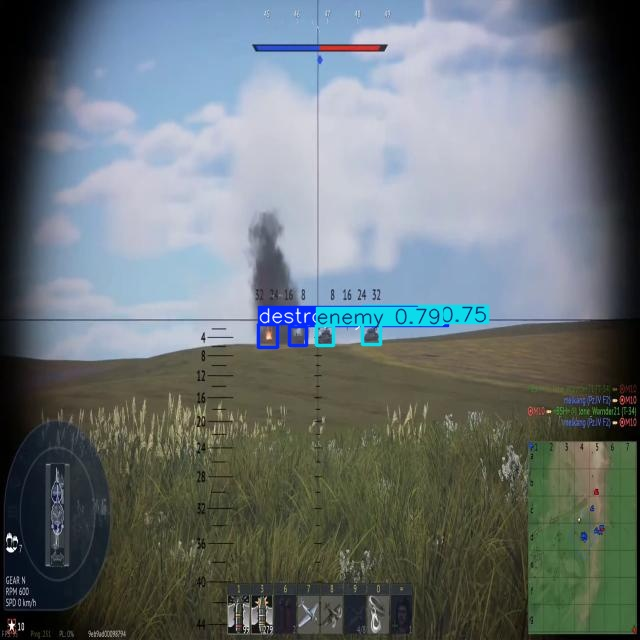

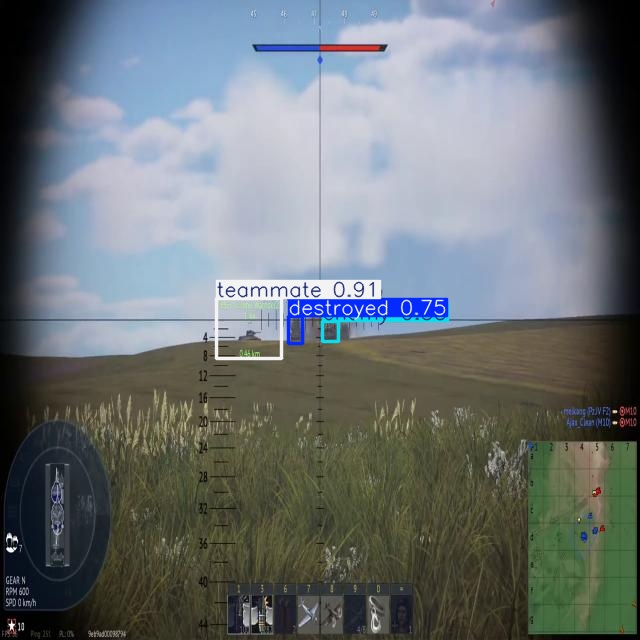

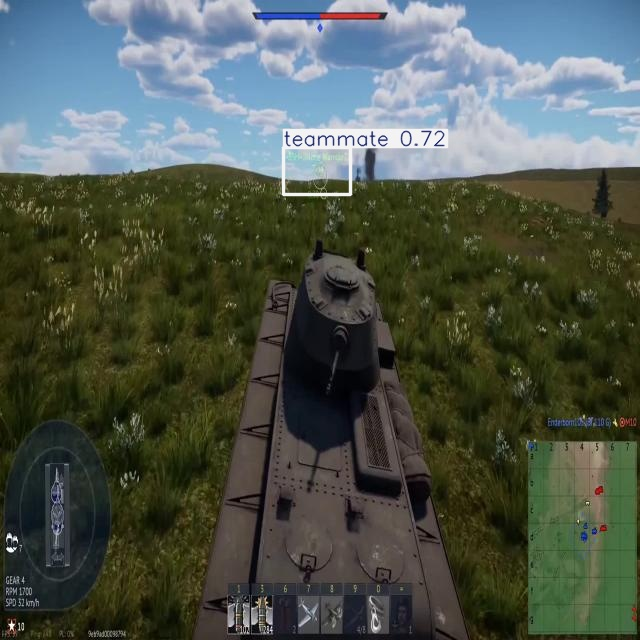

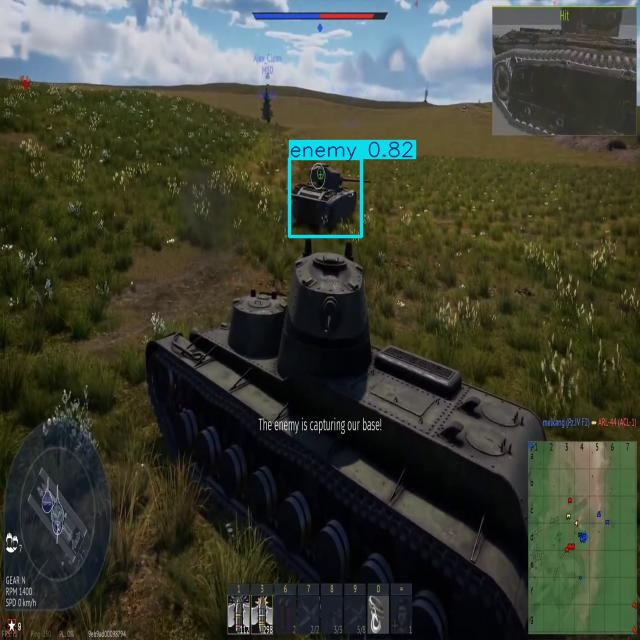

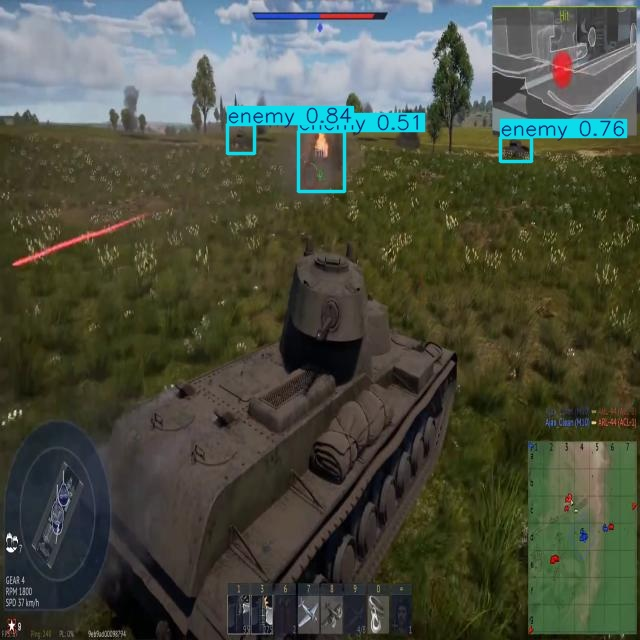

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg'):
  display(Image(filename=image_path, height=600))
  print("\n")